In [1]:
from scipy import stats

class capa():
  def __init__(self, n_neuronas_capa_anterior, n_neuronas, funcion_act):
    self.funcion_act = funcion_act
    self.b  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas).reshape(1,n_neuronas),3)
    self.W  = np.round(stats.truncnorm.rvs(-1, 1, loc=0, scale=1, size= n_neuronas * n_neuronas_capa_anterior).reshape(n_neuronas_capa_anterior,n_neuronas),3)

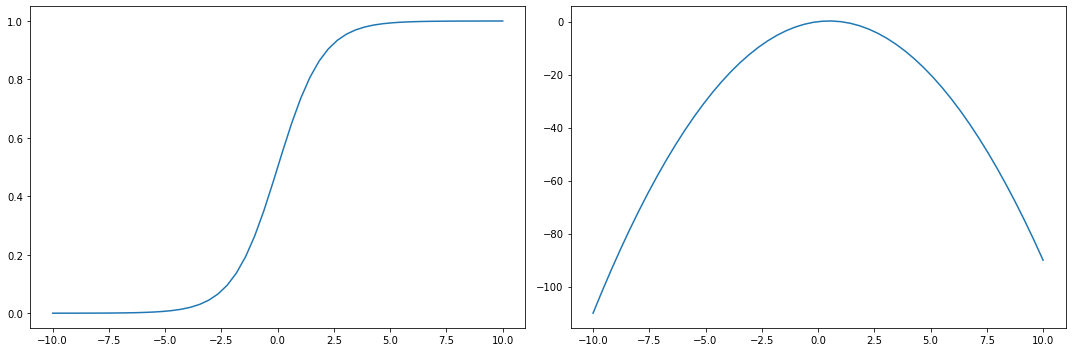

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt


sigmoid = (
  lambda x:1 / (1 + np.exp(-x)),
  lambda x:x * (1 - x)
  )

rango = np.linspace(-10,10).reshape([50,1])
datos_sigmoide = sigmoid[0](rango)
datos_sigmoide_derivada = sigmoid[1](rango)

#Cremos los graficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_sigmoide)
axes[1].plot(rango, datos_sigmoide_derivada)
fig.tight_layout()

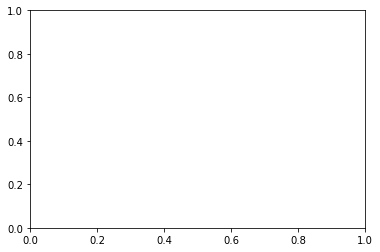

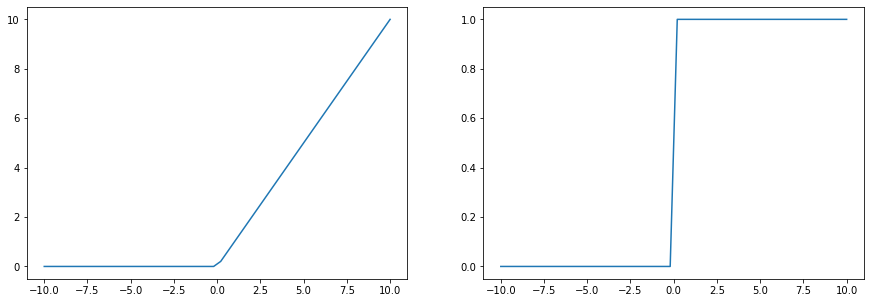

In [3]:
def derivada_relu(x):
  x[x<=0] = 0
  x[x>0] = 1
  return x

relu = (
  lambda x: x * (x > 0),
  lambda x:derivada_relu(x)
  )

datos_relu = relu[0](rango)
datos_relu_derivada = relu[1](rango)


# Volvemos a definir rango que ha sido cambiado
rango = np.linspace(-10,10).reshape([50,1])

# Cremos los graficos
plt.cla()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(15,5))
axes[0].plot(rango, datos_relu[:,0])
axes[1].plot(rango, datos_relu_derivada[:,0])
plt.show()

In [4]:
# Numero de neuronas en cada capa. 
# El primer valor es el numero de columnas de la capa de entrada.
neuronas = [2,4,8,1] 

# Funciones de activacion usadas en cada capa. 
funciones_activacion = [relu,relu, sigmoid]

In [5]:
red_neuronal = []

for paso in range(len(neuronas)-1):
  x = capa(neuronas[paso],neuronas[paso+1],funciones_activacion[paso])
  red_neuronal.append(x)

print(red_neuronal)

[<__main__.capa object at 0x0000021B4E7367C0>, <__main__.capa object at 0x0000021B52464B50>, <__main__.capa object at 0x0000021B4E799940>]


In [7]:
import random

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1):
  pi = math.pi
  r = R * np.sqrt(stats.truncnorm.rvs(minimo, maximo, size= num_datos)) * 10
  theta = stats.truncnorm.rvs(minimo, maximo, size= num_datos) * 2 * pi *10

  x = np.cos(theta) * r
  y = np.sin(theta) * r

  y = y.reshape((num_datos,1))
  x = x.reshape((num_datos,1))

  #Vamos a reducir el numero de elementos para que no cause un Overflow
  x = np.round(x,3)
  y = np.round(y,3)

  df = np.column_stack([x,y])
  return(df)

In [8]:
datos_1 = circulo(num_datos = 150, R = 2)
datos_2 = circulo(num_datos = 150, R = 0.5)
X = np.concatenate([datos_1,datos_2])
X = np.round(X,3)

Y = [0] * 150 + [1] * 150
Y = np.array(Y).reshape(len(Y),1)

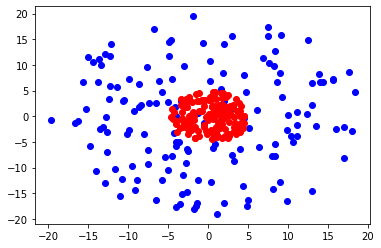

In [9]:
plt.cla()
plt.scatter(X[0:150,0],X[0:150,1], c = "b")
plt.scatter(X[150:300,0],X[150:300,1], c = "r")
plt.show()